# Import

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

from time import time

In [2]:
plt.style.use('fivethirtyeight')

# Dataset

In [3]:
# importo il dataset
data = load_wine(as_frame=True)

# creo dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# visualizzo statistiche descrittive del dataset
df.drop('label', axis=1).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Le feature hanno range di valori diversi tra loro, quindi sarà necessario applicare il *feature scaling*.

In [5]:
# visualizzo tipo di variabili e presenza di valori nulli
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

Non ci sono valori mancanti (NaN) nel dataset.

In [8]:
# creo gli array numpy con le feature e con la label
X = df.drop('label', axis=1).values
y = df.label.values

In [9]:
# applico feature scaling all'intero dataset al fine dell'applicazione della PCA per visualizzare il dataset
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)

PC	varianza
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074
PC_5:	0.056
PC_6:	0.047
PC_7:	0.037
PC_8:	0.024
PC_9:	0.023
PC_10:	0.023
PC_11:	0.014
PC_12:	0.013
PC_13:	0.008


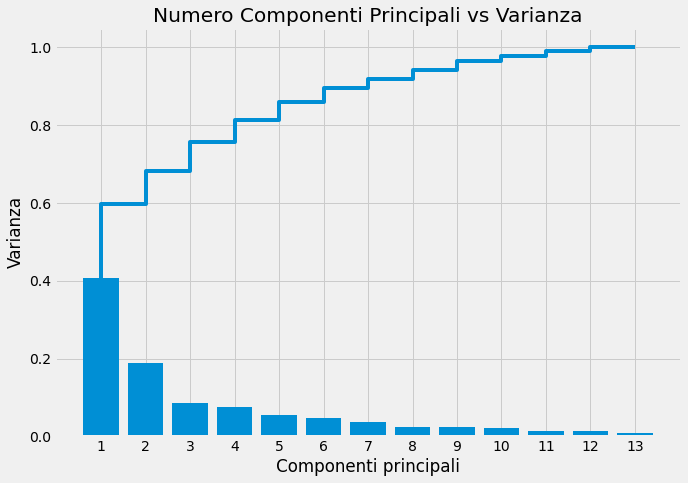

In [11]:
# determino percentuale di varianza per ogni componente principale

pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Componenti principali")
plt.ylabel("Varianza")
_ = plt.title('Numero Componenti Principali vs Varianza')

print('PC\tvarianza')
print('---\t--------')
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))

Il grafico mostra la percentuale di varianza per ogni componente principale, oltre che la varianza cumulativa. Si nota come le prime due componenti principali racchiudano più della metà della varianza totale (mentre le prime 5, ad esempio, oltre l'80%).

In [12]:
# applico PCA per portare la dimensionalità dei dati a 2 (per poterlo visualizzare)

n_components = 2
pca = PCA(n_components=n_components)
X_red = pca.fit_transform(X_sc)

x_lim = (-0.9,1)
y_lim = (-0.7,0.9)

In [13]:
# creo funzione per stampare lo scatter plot che rappresenta il dataset (in 2D dopo trasformazione con PCA)
def plot_dataset(X, y, limits=[None, None]):
    plt.figure(figsize=(10,8))
    scatter = plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', cmap='rainbow')
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Class")
    _ = plt.title('Wine Dataset')
    _ = plt.xlabel('PC1')
    _ = plt.ylabel('PC2')
    _ = plt.xlim(limits[0])
    _ = plt.ylim(limits[1])
    
    return scatter

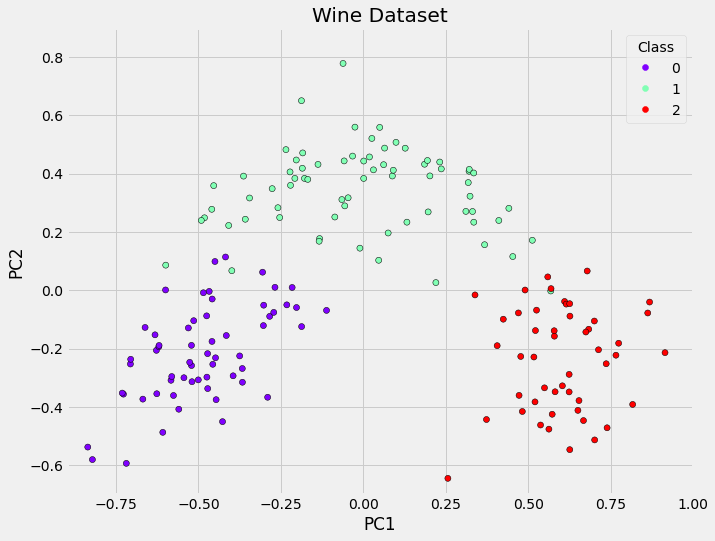

In [15]:
# visualizzo il dataset
_ = plot_dataset(X_red, y, limits=(x_lim, y_lim))

Considerando le sole 2 prime componenti principali, le classi risultano ben definite e linearmente separabili.

In [79]:
# creo set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [80]:
# creo la pipeline
estimators = [
              ('feat_scaler', MinMaxScaler()),
              ('dim_red', PCA()),
              ('poly_feat', PolynomialFeatures()),
              ('clf', LogisticRegression(max_iter=1000))
             ]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('feat_scaler', MinMaxScaler()), ('dim_red', PCA()),
                ('poly_feat', PolynomialFeatures()),
                ('clf', LogisticRegression(max_iter=1000))])

In [81]:
# imposto i possibili valori per ciascun parametro
param_grid = [
             {'dim_red__n_components':['passthrough', 1, 2, 3, 5, 8, 10],
              'poly_feat':['passthrough', 2, 3, 5],
              'clf':[LogisticRegression()],
              'clf__C':[0.01, 0.1, 10, 100]},
             {'dim_red__n_components':['passthrough', 1, 2, 3, 5, 8, 10],
              'poly_feat':['passthrough', 2, 3, 5],
              'clf':[SVC()],
              'clf__kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'clf__C':[0.01, 0.1, 10, 100],
              'clf__gamma': np.arange( 0.0, 10.0, 2.0).tolist()},
             {'dim_red__n_components':['passthrough', 2, 3, 5, 8, 10],
              'poly_feat':['passthrough'],
              'clf':[RandomForestClassifier()],
              'clf__max_depth':[5, 10, 20, None],
              'clf__min_samples_split':[1, 10, 20, 30, 40],
              'clf__min_samples_split':[1, 5, 10, 15, 20]},
             ]

In [82]:
# inizializzo grid search
model = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=3, n_jobs=-1) # implemento 10-fold cross validation
                                                                               # eseguo in parallelo su tutte le cpu disponibili 

In [83]:
%time
# ricerca migliori parametri + addestramento + cross validation
model.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Fitting 10 folds for each of 2472 candidates, totalling 24720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 12272 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 24720 out of 24720 | elapsed:   52.6s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('feat_scaler', MinMaxScaler()),
                                       ('dim_red', PCA()),
                                       ('poly_feat', PolynomialFeatures()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'clf': [LogisticRegression()],
                          'clf__C': [0.01, 0.1, 10, 100],
                          'dim_red__n_components': ['passthrough', 1, 2, 3, 5,
                                                    8, 10],
                          'poly_feat': ['passthrough', 2, 3, 5]},
                         {'clf': [SV...
                          'clf__gamma': [0.0, 2.0, 4.0, 6.0, 8.0],
                          'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                          'dim_red__n_components': ['passthrough', 1, 2, 3, 5,
                                       

In [84]:
# visualizzo parametri miglior modello
model.best_estimator_

Pipeline(steps=[('feat_scaler', MinMaxScaler()),
                ('dim_red', PCA(n_components=2)), ('poly_feat', 'passthrough'),
                ('clf', SVC(C=10, gamma=8.0))])

Il modello migliore individuato dal grid search risulta essere l'output di una regressione logistica il cui input è stato ridotto a 2 dimensioni dalla PCA. Il grado scelto per il polinomio è 1 (come si poteva dedurre dalle classi linearmente separabili visibili nello scatter plot). Il parametro di regolarizzazione C è stato impostato a 10 (per contrastare l'overfitting). 
Essendo che i valori selezionati dal grid search non cadono agli estremi della griglia definita, possiamo considerarli come i valori ottimali (in caso contrario si sarebbe dovuta ripetere la ricerca espandendo la griglia).

In [89]:
# valuto performance del modello

# accuracy
acc_train = accuracy_score(model.predict(X_train), y_train)
acc_test = accuracy_score(model.predict(X_test), y_test)

# precision, recall, fscore
prec_train, rec_train, fscore_train, _ = precision_recall_fscore_support(model.predict(X_train), y_train)
prec_test, rec_test, fscore_test, _ = precision_recall_fscore_support(model.predict(X_test), y_test)

# stampo valori
print('\t\tTRAIN\t\t\tTEST')
print('\t\t---------------\t\t----------------')
print('accuracy\t{:.2f}\t\t\t{:.2f}'.format(acc_train, acc_test))
print('')
print('precision\t{:.2f}, {:.2f}, {:.2f}\t{:.2f}, {:.2f}, {:.2f}'.format(*prec_train, *prec_test))
print('')
print('recall\t\t{:.2f}, {:.2f}, {:.2f}\t{:.2f}, {:.2f}, {:.2f}'.format(*rec_train, *rec_test))
print('')
print('fscore\t\t{:.2f}, {:.2f}, {:.2f}\t{:.2f}, {:.2f}, {:.2f}'.format(*fscore_train, *fscore_test))
print('')

		TRAIN			TEST
		---------------		----------------
accuracy	0.99			0.97

precision	1.00, 0.97, 1.00	1.00, 0.92, 1.00

recall		0.98, 1.00, 0.97	0.93, 1.00, 1.00

fscore		0.99, 0.98, 0.99	0.97, 0.96, 1.00



Le metriche mostrano l'ottima performance del modello nel classificare ciascuna delle classi, ed essendo le metriche sul test simili a quelle sul train set, l'assenza di particolare overfitting.

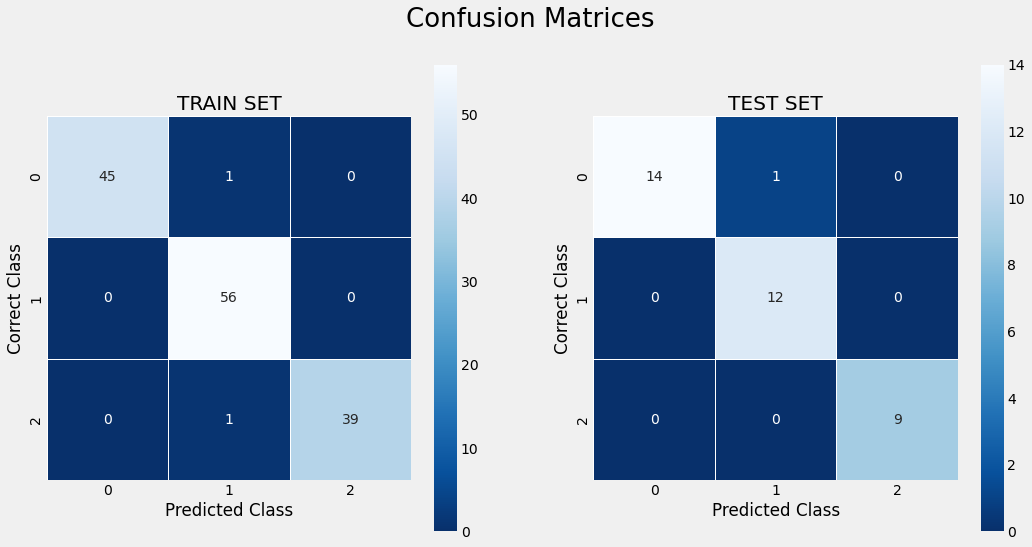

In [90]:
# visualizzo matrice di confusione
cm_train = confusion_matrix(model.predict(X_train), y_train)
cm_test = confusion_matrix(model.predict(X_test), y_test)

fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.heatmap(cm_train, annot=True, cmap="Blues_r", linewidths=.5, square=True, ax=ax[0])
sns.heatmap(cm_test, annot=True, cmap="Blues_r", linewidths=.5, square=True, ax=ax[1])

fig.suptitle('Confusion Matrices', fontsize=26)

_ = ax[0].set_title('TRAIN SET')
_ = ax[0].set_xlabel("Predicted Class")
_ = ax[0].set_ylabel("Correct Class")

_ = ax[1].set_title('TEST SET')
_ = ax[1].set_xlabel("Predicted Class")
_ = ax[1].set_ylabel("Correct Class")

Le matrici di confusione mostrano i (pochi) errori commessi dalle predizioni del modello sul set di test.

In [91]:
def plot_decision_boundary(X, model, limits=(None, None)):
    h = .02
    if(limits[0] == None or limits[1]== None):
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
    else:
         x_min, x_max = limits[0]
         y_min, y_max = limits[1]
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    decision_boundary = plt.contourf(xx, yy, Z, cmap='rainbow', alpha=.2)
    
    return decision_boundary

In [87]:
# creo variabile per miglior modello
best_model = model.best_estimator_.named_steps.clf

Avendo il grid search impostato 2 come numero di componenti principali ottimali, è possibile visualizzare il decision boundary in 2D sullo scatter plot precedente.


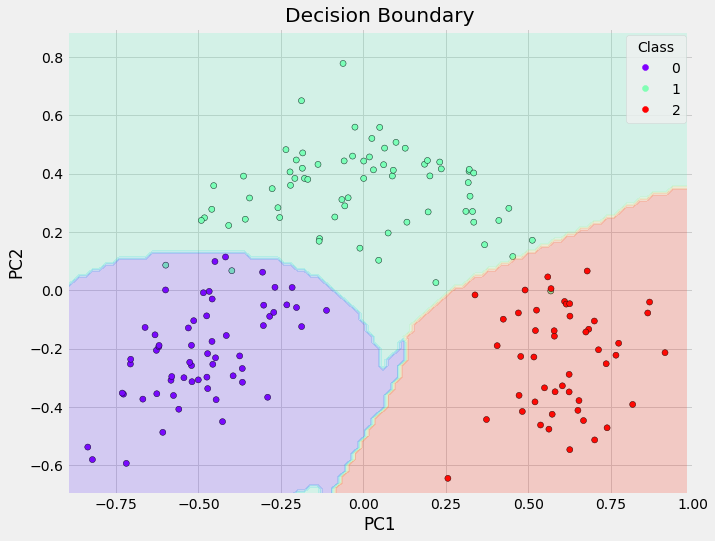

In [88]:
# visualizzo decision boundary
if(model.best_estimator_.named_steps.dim_red.n_components == 2):
    print('Avendo il grid search impostato 2 come numero di componenti principali ottimali, è possibile visualizzare il decision boundary in 2D sullo scatter plot precedente.')
    _ = plot_dataset(X_red, y, limits=(x_lim, y_lim))
    _ = plot_decision_boundary(X_red, best_model, limits=(x_lim, y_lim))
    _ = plt.title('Decision Boundary')